# Salary Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
import ast
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill )


In [5]:
df_US = df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])


In [7]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [22]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_title = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index


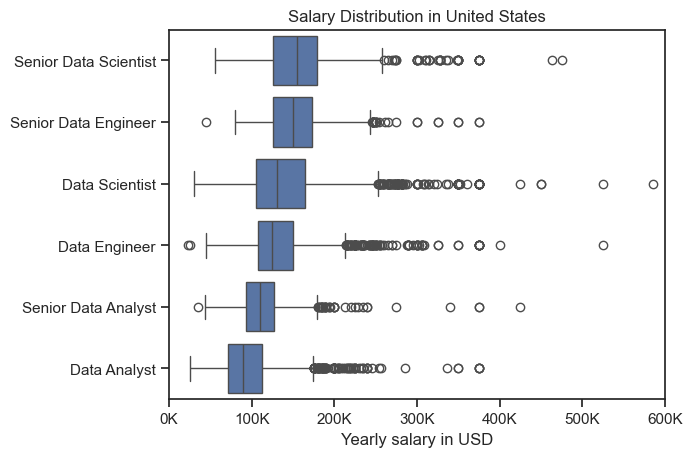

In [23]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_title)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in United States')
plt.ylabel('')
plt.xlabel('Yearly salary in USD')
plt.xlim(0,600000)
tick_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(tick_x)
plt.show()